In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
match_data = pd.read_csv("IPL Matches 2008-2020.csv")
match_data.head(7)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
5,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,Hyderabad,2008-04-22,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,N,NaN,IL Howell,AM Saheba


In [5]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [6]:
match_data.tail()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
815,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


In [7]:
match_data.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [8]:
match_data.shape

(816, 17)

In [9]:
# Check for null values
match_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [10]:
# Look for duplicates
match_data.duplicated().sum()

0

In [11]:
# Venuw names with matches played in respective one
match_data["venue"].value_counts().head(3)

venue
Eden Gardens        77
Feroz Shah Kotla    74
Wankhede Stadium    73
Name: count, dtype: int64

In [12]:
# finding Unique venue
match_data["venue"].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [13]:
# number of Venues Played at
match_data['venue'].nunique()

36

In [14]:
# number of team played matches team1
match_data["team1"].nunique()

15

In [15]:
# number of team played matches team2

match_data["team2"].nunique()

15

In [16]:
# find the Second higest
print(match_data["toss_winner"].value_counts().index[1])
print(match_data["toss_winner"].value_counts().head(2).tail(1))

Kolkata Knight Riders
toss_winner
Kolkata Knight Riders    98
Name: count, dtype: int64


In [17]:
# Fetching only names of teams
match_data["toss_winner"].value_counts(ascending=False)[0:5].index


Index(['Mumbai Indians', 'Kolkata Knight Riders', 'Chennai Super Kings',
       'Royal Challengers Bangalore', 'Rajasthan Royals'],
      dtype='object', name='toss_winner')

In [18]:
# Man of the match with total wins
match_data["player_of_match"].value_counts().head(5)

player_of_match
AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
Name: count, dtype: int64

In [19]:
# nulls in Winner
match_data[match_data["winner"].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong


In [20]:
# nulls in result_margin
match_data[match_data["result_margin"].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
66,392190,Cape Town,2009-04-23,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,Y,NaN,MR Benson,M Erasmus
130,419121,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,Y,NaN,K Hariharan,DJ Harper
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker
328,598004,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,Y,NaN,AK Chaudhary,S Ravi
341,598017,Bangalore,2013-04-16,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,M Erasmus,VA Kulkarni
416,729315,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,Y,NaN,Aleem Dar,AK Chaudhary
476,829741,Ahmedabad,2015-04-21,SE Marsh,"Sardar Patel Stadium, Motera",0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,Y,NaN,M Erasmus,S Ravi
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
610,1082625,Rajkot,2017-04-29,KH Pandya,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,Y,NaN,AK Chaudhary,CB Gaffaney


In [21]:
# General data Information
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [22]:
# Adding nre column season 
match_data["date"]= pd.to_datetime(match_data["date"])
match_data["season"] = match_data['date'].dt.year
match_data.head(8)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008
5,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin,2008
6,335988,Hyderabad,2008-04-22,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,N,NaN,IL Howell,AM Saheba,2008
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar,2008


In [23]:
# Top 3 Seasons
match_data['season'].value_counts().head(3)

season
2013    76
2012    74
2011    73
Name: count, dtype: int64

In [24]:
# counts matches played in each Season
match_data['season'].value_counts()

season
2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2020    60
2015    59
2017    59
2008    58
2009    57
Name: count, dtype: int64

[Text(0, 0, '76'),
 Text(0, 0, '74'),
 Text(0, 0, '73'),
 Text(0, 0, '60'),
 Text(0, 0, '60'),
 Text(0, 0, '60'),
 Text(0, 0, '60'),
 Text(0, 0, '60'),
 Text(0, 0, '60'),
 Text(0, 0, '59'),
 Text(0, 0, '59'),
 Text(0, 0, '58'),
 Text(0, 0, '57')]

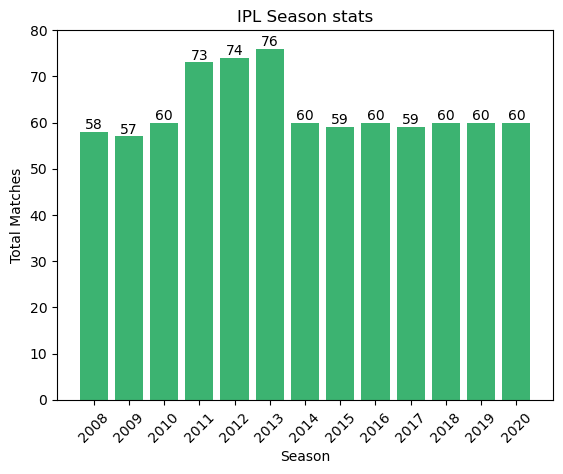

In [25]:
# Sorting basis of Index values
season_match = match_data['season'].value_counts()
season_match.sort_index()
bars = plt.bar(x= season_match.index, height = season_match.values,color="mediumseagreen",)
plt.xticks(season_match.index,rotation=45)
plt.yticks(np.arange(0,max(season_match.values)+10,10))
plt.xlabel("Season")
plt.ylabel("Total Matches")
plt.title("IPL Season stats")
plt.bar_label(bars)

[Text(0, 0, '76'),
 Text(0, 0, '74'),
 Text(0, 0, '73'),
 Text(0, 0, '60'),
 Text(0, 0, '60'),
 Text(0, 0, '60'),
 Text(0, 0, '60'),
 Text(0, 0, '60'),
 Text(0, 0, '60'),
 Text(0, 0, '59'),
 Text(0, 0, '59'),
 Text(0, 0, '58'),
 Text(0, 0, '57')]

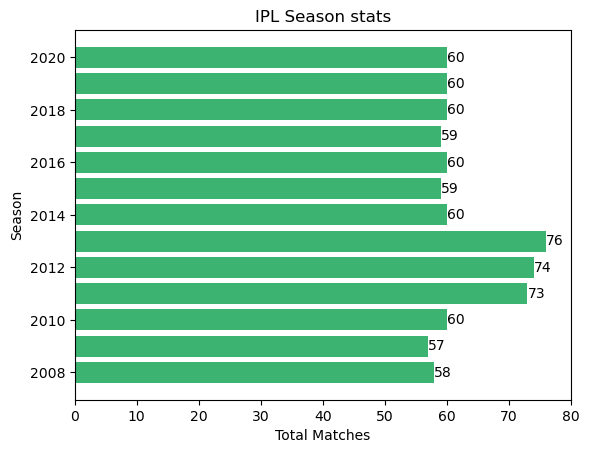

In [26]:
# Sorting basis of Index values
season_match = match_data['season'].value_counts()
season_match.sort_index()
bars = plt.barh(y = season_match.index, width = season_match.values,color="mediumseagreen",)
plt.xticks(np.arange(0,max(season_match.values)+10,10))
plt.yticks()
plt.xlabel("Total Matches")
plt.ylabel("Season")
plt.title("IPL Season stats")
plt.bar_label(bars)

# Piechart for Man of the Match Vkohli vs ABD

In [28]:
cond1 = match_data['player_of_match'] == 'V Kohli'
cond2 = match_data["player_of_match"] == 'AB de Villiers'
v_df = match_data[cond1 | cond2] ['player_of_match']
print(v_df)
v_df = v_df.value_counts()
print(v_df)

65     AB de Villiers
105    AB de Villiers
177    AB de Villiers
203           V Kohli
208           V Kohli
252    AB de Villiers
278    AB de Villiers
296    AB de Villiers
341           V Kohli
366    AB de Villiers
372           V Kohli
392           V Kohli
421    AB de Villiers
439    AB de Villiers
502    AB de Villiers
508           V Kohli
514    AB de Villiers
520    AB de Villiers
532    AB de Villiers
535           V Kohli
551           V Kohli
560    AB de Villiers
564           V Kohli
566           V Kohli
572           V Kohli
573    AB de Villiers
654    AB de Villiers
680    AB de Villiers
686    AB de Villiers
723    AB de Villiers
730           V Kohli
737    AB de Villiers
786    AB de Villiers
789           V Kohli
804    AB de Villiers
811    AB de Villiers
Name: player_of_match, dtype: object
player_of_match
AB de Villiers    23
V Kohli           13
Name: count, dtype: int64


<Axes: title={'center': 'Vkohli vs ABD'}, ylabel='count'>

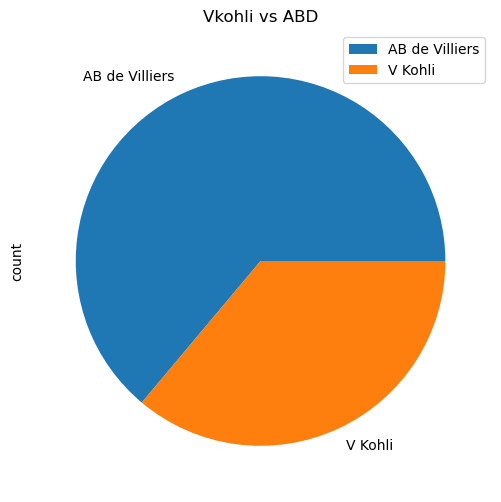

In [29]:
# Piechart
v_df.plot(kind='pie',figsize=(10,6),title="Vkohli vs ABD",legend = True)

# Group By

In [31]:
match_data.groupby("season").size()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
dtype: int64

In [32]:
season_group = match_data.groupby("season")
season_group.get_group(2008).head(3)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008


In [33]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2',
       'season'],
      dtype='object')

In [34]:
winner_group = match_data.groupby('winner')
winner_group.get_group('Chennai Super Kings')

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar,2008
11,335993,Chennai,2008-04-26,JDP Oram,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,bat,Chennai Super Kings,wickets,9.0,N,NaN,BF Bowden,AV Jayaprakash,2008
14,335996,Bangalore,2008-04-28,MS Dhoni,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13.0,N,NaN,BR Doctrove,RB Tiffin,2008
27,336009,Delhi,2008-05-08,MS Dhoni,Feroz Shah Kotla,0,Delhi Daredevils,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,4.0,N,NaN,Aleem Dar,RB Tiffin,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,1216506,Abu Dhabi,2020-11-01,RD Gaikwad,Sheikh Zayed Stadium,0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,9.0,N,NaN,PG Pathak,VK Sharma,2020
777,1216513,Dubai,2020-10-04,SR Watson,Dubai International Cricket Stadium,0,Kings XI Punjab,Chennai Super Kings,Kings XI Punjab,bat,Chennai Super Kings,wickets,10.0,N,NaN,AY Dandekar,Nitin Menon,2020
792,1216528,Dubai,2020-10-13,RA Jadeja,Dubai International Cricket Stadium,0,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,bat,Chennai Super Kings,runs,20.0,N,NaN,AK Chaudhary,PR Reiffel,2020
800,1216536,Dubai,2020-10-29,RD Gaikwad,Dubai International Cricket Stadium,0,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,6.0,N,NaN,C Shamshuddin,RK Illingworth,2020


In [35]:
winner_group.get_group('Chennai Super Kings').value_counts()

id      city       date        player_of_match  venue            neutral_venue  team1                  team2                toss_winner            toss_decision  winner               result  result_margin  eliminator  method  umpire1    umpire2         season
336025  Kolkata    2008-05-18  M Ntini          Eden Gardens     0              Kolkata Knight Riders  Chennai Super Kings  Kolkata Knight Riders  bat            Chennai Super Kings  runs    3.0            N           D/L     Asad Rauf  K Hariharan     2008      1
392214  Centurion  2009-05-07  ML Hayden        SuperSport Park  1              Chennai Super Kings    Kings XI Punjab      Chennai Super Kings    bat            Chennai Super Kings  runs    12.0           N           D/L     DJ Harper  TH Wijewardene  2009      1
Name: count, dtype: int64

In [36]:
# unstack() converts rows into columns stack() does vice versa
# it is used for Pivoting
team_group = match_data.groupby(['winner','venue'])
team_group.size().unstack()

venue,Barabati Stadium,Brabourne Stadium,Buffalo Park,De Beers Diamond Oval,Dr DY Patil Sports Academy,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,Dubai International Cricket Stadium,Eden Gardens,Feroz Shah Kotla,Green Park,...,Saurashtra Cricket Association Stadium,Sawai Mansingh Stadium,Shaheed Veer Narayan Singh International Stadium,Sharjah Cricket Stadium,Sheikh Zayed Stadium,St George's Park,Subrata Roy Sahara Stadium,SuperSport Park,"Vidarbha Cricket Association Stadium, Jamtha",Wankhede Stadium
winner,,,,,,,,,,,,,,,,,,,,,
Chennai Super Kings,NaN,1.0,1.0,1.0,3.0,2.0,6.0,5.0,6.0,NaN,...,NaN,3.0,NaN,1.0,3.0,2.0,1.0,2.0,NaN,7.0
Deccan Chargers,3.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,1.0
Delhi Capitals,NaN,NaN,NaN,NaN,NaN,1.0,4.0,1.0,4.0,NaN,...,NaN,1.0,NaN,3.0,2.0,NaN,NaN,NaN,NaN,1.0
Delhi Daredevils,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0,27.0,1.0,...,1.0,1.0,4.0,1.0,NaN,1.0,1.0,2.0,NaN,2.0
Gujarat Lions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Kings XI Punjab,1.0,NaN,NaN,1.0,NaN,1.0,5.0,3.0,5.0,NaN,...,2.0,1.0,NaN,4.0,2.0,1.0,1.0,NaN,NaN,5.0
Kochi Tuskers Kerala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Kolkata Knight Riders,3.0,NaN,NaN,NaN,2.0,NaN,2.0,45.0,5.0,NaN,...,1.0,3.0,NaN,1.0,6.0,NaN,3.0,1.0,NaN,1.0
Mumbai Indians,NaN,6.0,1.0,NaN,5.0,2.0,3.0,10.0,4.0,NaN,...,1.0,2.0,NaN,2.0,6.0,2.0,2.0,1.0,NaN,42.0


In [37]:
team_group.size().unstack(fill_value = 0).head(5)

venue,Barabati Stadium,Brabourne Stadium,Buffalo Park,De Beers Diamond Oval,Dr DY Patil Sports Academy,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,Dubai International Cricket Stadium,Eden Gardens,Feroz Shah Kotla,Green Park,...,Saurashtra Cricket Association Stadium,Sawai Mansingh Stadium,Shaheed Veer Narayan Singh International Stadium,Sharjah Cricket Stadium,Sheikh Zayed Stadium,St George's Park,Subrata Roy Sahara Stadium,SuperSport Park,"Vidarbha Cricket Association Stadium, Jamtha",Wankhede Stadium
winner,,,,,,,,,,,,,,,,,,,,,
Chennai Super Kings,0,1,1,1,3,2,6,5,6,0,...,0,3,0,1,3,2,1,2,0,7
Deccan Chargers,3,0,0,1,2,0,0,0,2,0,...,0,0,0,0,0,0,1,2,2,1
Delhi Capitals,0,0,0,0,0,1,4,1,4,0,...,0,1,0,3,2,0,0,0,0,1
Delhi Daredevils,0,0,1,0,1,1,1,1,27,1,...,1,1,4,1,0,1,1,2,0,2
Gujarat Lions,0,0,0,0,0,0,0,2,1,2,...,3,0,0,0,0,0,0,0,0,1


In [38]:
venue_team_wins = match_data.groupby(['venue','winner']).size().unstack(fill_value = 0)
venue_team_wins.head(5)

winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
venue,,,,,,,,,,,,,,,
Barabati Stadium,0,3,0,0,0,1,0,3,0,0,0,0,0,0,0
Brabourne Stadium,1,0,0,0,0,0,0,0,6,0,2,0,0,1,1
Buffalo Park,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
De Beers Diamond Oval,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
Dr DY Patil Sports Academy,3,2,0,1,0,0,0,2,5,2,1,0,0,1,0


In [39]:
match_t = match_data.copy()
match_t.replace("Rising Pune Supergiant","Rising Pune Supergiants", inplace = True)
match_t['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Delhi Capitals'], dtype=object)

In [40]:
# Replacing Giants Value
match_data.replace("Rising Pune Supergiant","Rising Pune Supergiants", inplace = True)
match_data[match_data['winner'] == 'Rising Pune Supergiant']
match_data.groupby(['venue','winner']).size().unstack(fill_value = 0).head(2)


winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
venue,,,,,,,,,,,,,,
Barabati Stadium,0,3,0,0,0,1,0,3,0,0,0,0,0,0
Brabourne Stadium,1,0,0,0,0,0,0,0,6,0,2,0,1,1


In [41]:
# Loc() used when name labels are used and iloc() are used for ibuilt labels to access rows
# Print number of matches played by each team on Brabourne stadium 

# Grouping venue and winner together and creating a pivot like table
test = match_data.groupby(['venue','winner']).size().unstack(fill_value = 0)
# Finding top 5 venue based on number of matched played
topVenue =match_data['venue'].value_counts().head(5).index
# Getting information og top 5 venue only for each team
test = test.loc[ topVenue ].T

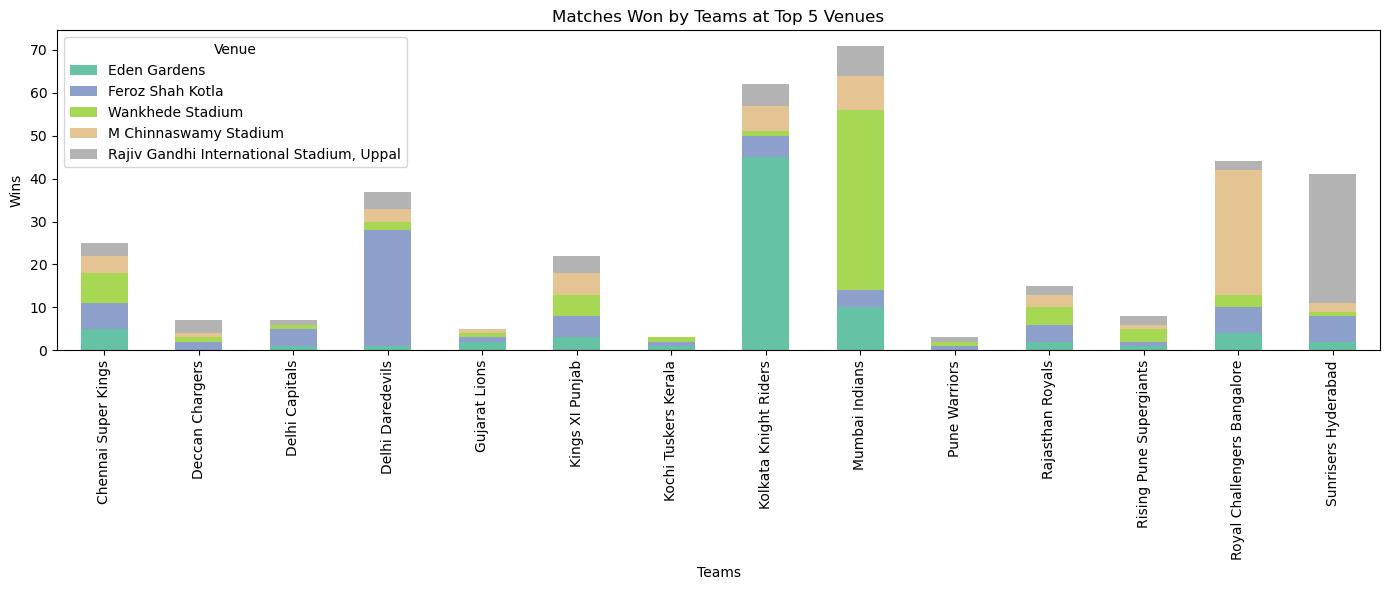

In [42]:
test.plot(kind = 'bar', stacked = True, figsize=(14,6), colormap='Set2')
plt.title("Matches Won by Teams at Top 5 Venues")
plt.xlabel("Teams")
plt.ylabel("Wins")
plt.legend(title = 'Venue', loc='upper left')
plt.tight_layout()
plt.show()

In [43]:
# Home work
# Question1: Find out Abd villers six,four,double rum or single run pie-chart
# Question2: Find out maximum portion through which Virat Kohli has been Dismissed Pie-Chart Sliced max portion
# Question3: Create a Bar Graph For The Best 3 Empires Combination
# Study stack unstack loc and iloc

In [183]:
# Find out in each season how much team like to bat or ball first
# Get the Number of Wickets taken by Ishan Sharma with bold vs other type
season_info = match_data.groupby(['toss_winner','season','toss_decision']).size().unstack(fill_value = 0)
season_info.head(50)

toss_decision                 bat  field
toss_winner           season            
Chennai Super Kings   2008      4      1
                      2009      6      1
                      2010      7      3
                      2011      7      2
                      2012      4      3
                      2013      5      3
                      2014      4      6
                      2015      7      3
                      2018      1     10
                      2019      3      9
                      2020      3      5
Deccan Chargers       2008      4      5
                      2009      5      5
                      2010      5      4
                      2011      3      3
                      2012      7      2
Delhi Capitals        2019      2      8
                      2020      5      5
Delhi Daredevils      2008      2      4
                      2009      4      5
                      2010      5      3
                      2011      4      5
                      2012      2      8
                      2013      3      2
                      2014      1      3
                      2015      2      3
                      2016      0      8
                      2017      3      5
                      2018      3      5
Gujarat Lions         2016      0      8
                      2017      1      6
Kings XI Punjab       2008      4      4
                      2009      3      3
                      2010      3      2
                      2011      3      7
                      2012      4      4
                      2013      2      5
                      2014      1      6
                      2015      3      4
                      2016      2      4
                      2017      0      4
                      2018      1      6
                      2019      0      6
                      2020      1      3
Kochi Tuskers Kerala  2011      3      5
Kolkata Knight Riders 2008      6      0
                      2009      4      3
                      2010      6      1
                      2011      1      6
                      2012      4      3

In [155]:

# Load the dataset
file_path = 'IPL Ball-by-Ball 2008-2020.csv'
ball_df = pd.read_csv(file_path)

# Filter only the dismissals by Ishant Sharma
ishant_wickets = ball_df[
    (ball_df['bowler'] == 'I Sharma') &
    (ball_df['player_dismissed'].notna()) &
    (ball_df['dismissal_kind'].notna())
]

# Count the dismissal types
dismissal_counts = ishant_wickets['dismissal_kind'].value_counts()

# Separate Bowled and Other
bowled_count = dismissal_counts.get('bowled', 0)
other_count = dismissal_counts.sum() - bowled_count

# Display the result
print("📊 Ishant Sharma – Wicket Summary (IPL 2008–2020)")
print(f"Bowled: {bowled_count}")
print(f"Other types (caught, lbw, etc.): {other_count}")


📊 Ishant Sharma – Wicket Summary (IPL 2008–2020)
Bowled: 16
Other types (caught, lbw, etc.): 57


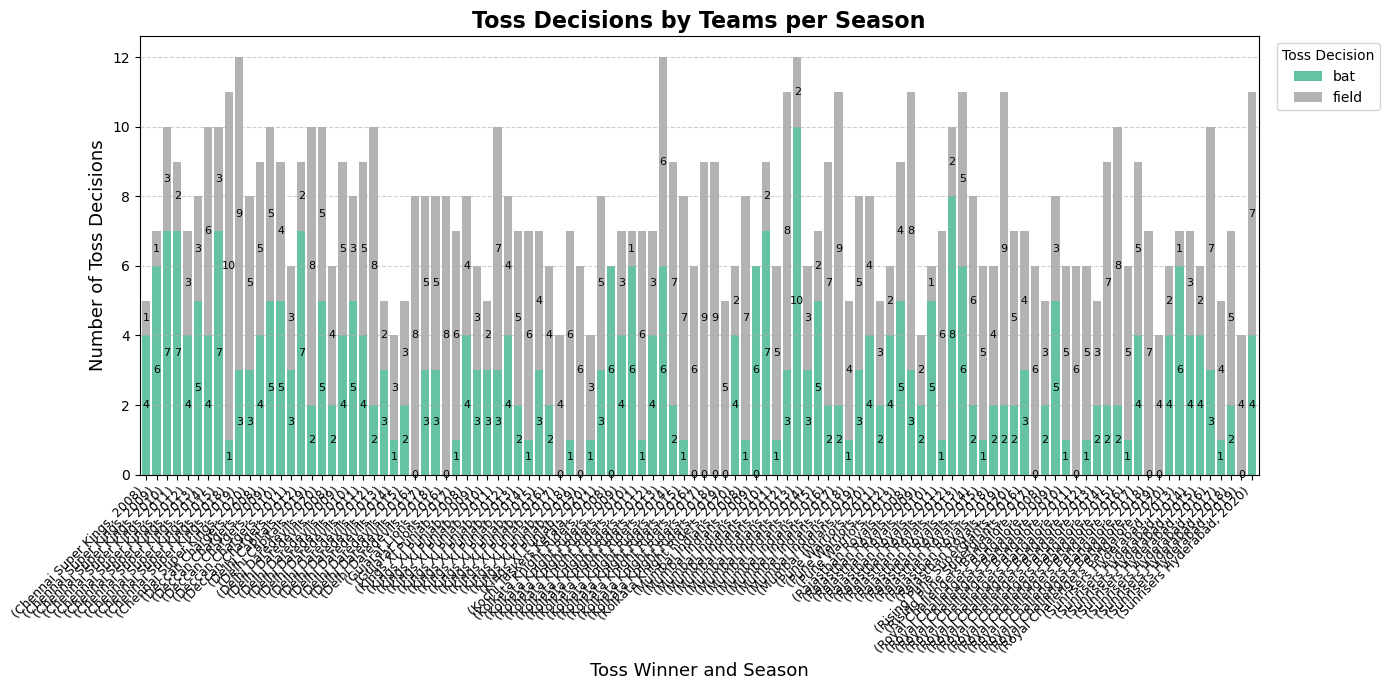

In [173]:
 ax = season_info.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='Set2',
    width=0.8
)

# Improved Title and Axis Labels
plt.title('Toss Decisions by Teams per Season', fontsize=16, weight='bold')
plt.xlabel('Toss Winner and Season', fontsize=13)
plt.ylabel('Number of Toss Decisions', fontsize=13)

# Gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Move legend outside the plot
plt.legend(title='Toss Decision', bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=10)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=9)

# Add value labels inside bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8, color='black')

# Optimize layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

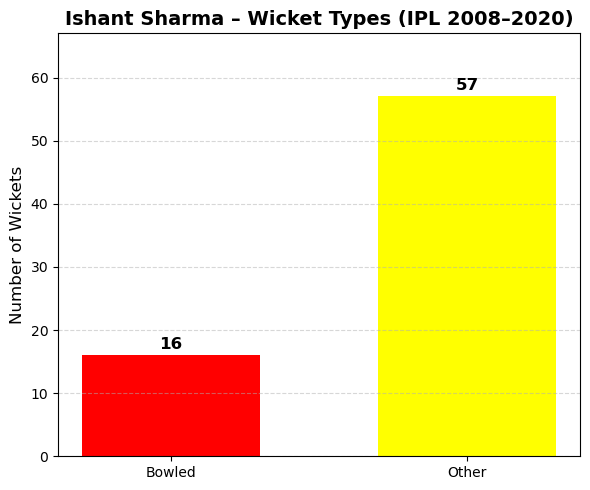

In [185]:
file_path = 'IPL Ball-by-Ball 2008-2020.csv'
ball_df = pd.read_csv(file_path)

# Filter only the dismissals by Ishant Sharma
ishant_wickets = ball_df[
    (ball_df['bowler'] == 'I Sharma') &
    (ball_df['player_dismissed'].notna()) &
    (ball_df['dismissal_kind'].notna())
]

# Count the dismissal types
dismissal_counts = ishant_wickets['dismissal_kind'].value_counts()

# Separate Bowled and Other
bowled_count = dismissal_counts.get('bowled', 0)
other_count = dismissal_counts.sum() - bowled_count

# Prepare data for plotting
labels = ['Bowled', 'Other']
values = [bowled_count, other_count]
colors = ['red', 'yellow']  # लाल और पीला

# Plotting
plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color=colors, width=0.6)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height}', ha='center', fontsize=12, weight='bold')

# Add titles and labels
plt.title("Ishant Sharma – Wicket Types (IPL 2008–2020)", fontsize=14, weight='bold')
plt.ylabel("Number of Wickets", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, max(values) + 10)

# Display the plot
plt.tight_layout()
plt.show()

In [202]:
# for Ishan Sharma for each team how many matches he has played along with the number wickets he has taken
match_data.head(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008


In [208]:
# Create a bar grapg the toal runs scored and the total number of wickets taken by each team in each season
ball_data.head(2)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [214]:
team_info = ball_data.groupby(['bowling_team','is_wicket']).size().unstack(fill_value=0)
team_info

is_wicket,0,1
bowling_team,,
Chennai Super Kings,20120,1104
Deccan Chargers,8593,446
Delhi Capitals,3800,212
Delhi Daredevils,17807,912
Gujarat Lions,3391,149
Kings XI Punjab,21387,1070
Kochi Tuskers Kerala,1540,74
Kolkata Knight Riders,21504,1079
Mumbai Indians,23216,1237
